In [4]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from lmfit.models import VoigtModel

In [2]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

#Actividad 1
Data1A1 = Data(r'C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos de actividad 1 3 a 55 grados')

#Actividad 2 calibración
Data1A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF sin material 6 a 16 grados")

#Actividad 2 Al
Data2A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al002 6 a 16 grados")
Data3A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF Al004 6 a 16 grados")
Data4A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al006 6 a 16 grados")
Data5A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al008 6 a 16 grados")

#Actividad 2 Zn
Data6A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0025 6 a 16 grados")
Data7A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 005 6 a 16 grados")
Data8A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0075 6 a 16 grados")
Data9A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 001 6 a 16 grados")


**Actividad 1: Rayos x característicos del cobre.**

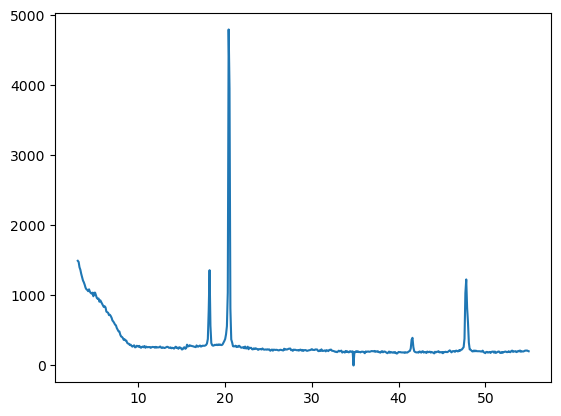

In [28]:
#Grafica general para visualizar los datos
plt.plot(Data1A1['Ang'],Data1A1['In'])

In [44]:
#Parámetros y funciones globales
dZn = 2.014 #x10^(-10) m 
dKBr = 3.290 #x10^(-10) m

#Ajuste Lorentziano: h peak height, x0 peak position, W peak width peak_widths
def Lorentzian(x,h,x0,W):
    return h*W**2/((x-x0)**2+W**2)

La longitud de onda de K alfa es 1.95 y de K beta es 1.49 Armstrong; sus incertidumbres son 0.006 y 0.19 respectivamente
Las energías para alfa y beta serán 0.83 y 0.64 Kv


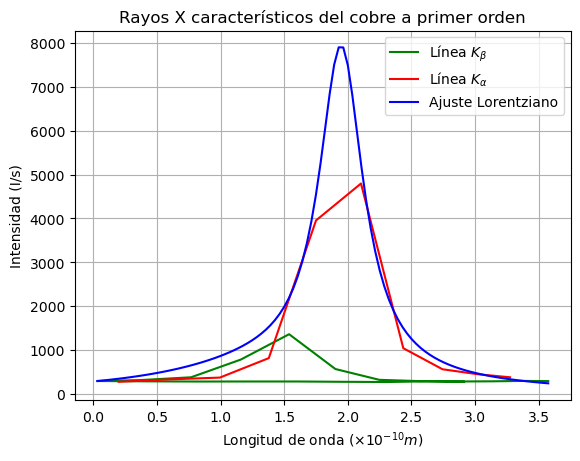

In [85]:
#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x1 = []
y1 = []
x11 = []
y11 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=17.0 and Data1A1['Ang'][i]<19.0: 
        #Selle aplica el factor de calibracion de 2.1 grados a los datos de angulo
        
        x1.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]-2.1))/1))
        y1.append(Data1A1['In'][i])

    if Data1A1['Ang'][i]>=20.0 and Data1A1['Ang'][i]<21.0: 
        x11.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]-2.1))/1))
        y11.append(Data1A1['In'][i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt1, pcov1 = curve_fit(Lorentzian,xdata=x1, ydata=y1)
popt11, pcov11 = curve_fit(Lorentzian,xdata=x11, ydata=y11)

h1 = popt1[0]
x01 = popt1[1]
W1 = popt1[2]
error1 = np.sqrt(np.diag(pcov1)) #Desviación estándar dada por el ajuste


h11 = popt11[0]
x011 = popt11[1]
W11 = popt11[2]
error11 = np.sqrt(np.diag(pcov11)) #Desviación estándar dada por el ajuste

x1_ = np.linspace(min(x1),max(x1),100)

#Cálculo de energías y longitudes de onda.
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(x011,2),round(x01,2),round(error11[1],3),round(error1[1],2)))
Ea = 12.40 / (x01*10) #Esto para que quede nm KV/nm
Eb = 12.40 / (x011*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea,2),round(Eb,2)))

#Gráfico
plt.plot(x1,y1,color='g',label=r'Línea $K_\beta$')
plt.plot(x11,y11,color='r',label=r'Línea $K_\alpha$')
plt.plot(x1_,Lorentzian(x1_,h1,x01,W1)+Lorentzian(x1_,h11,x011,W11),color='b', label=r'Ajuste Lorentziano')
plt.grid()
plt.title('Rayos X característicos del cobre a primer orden')
plt.xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
plt.ylabel('Intensidad (I/s)')
plt.legend()
plt.show()


La longitud de onda de K alfa es 1.24 y de K beta es 1.26; sus incertidumbres son 0.02 y 0.06 respectivamente
Las energías para alfa y beta serán 0.99 y 1.0 Kv


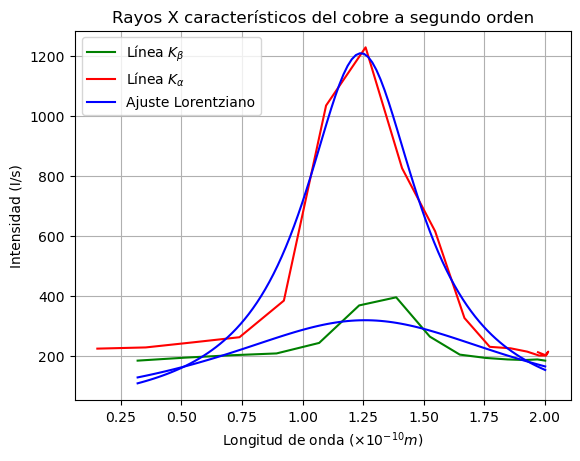

In [77]:
#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x1 = []
y1 = []
x11 = []
y11 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=41.0 and Data1A1['Ang'][i]<42.4: 
        x1.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/2))
        y1.append(Data1A1['In'][i])

    if Data1A1['Ang'][i]>=47.2 and Data1A1['Ang'][i]<49.0: 
        x11.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/2))
        y11.append(Data1A1['In'][i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt1, pcov1 = curve_fit(Lorentzian,xdata=x1, ydata=y1)
popt11, pcov11 = curve_fit(Lorentzian,xdata=x11, ydata=y11)

h1 = popt1[0]
x01 = popt1[1]
W1 = popt1[2]
error1 = np.sqrt(np.diag(pcov1))

h11 = popt11[0]
x011 = popt11[1]
W11 = popt11[2]
error11 = np.sqrt(np.diag(pcov11))

x1_ = np.linspace(min(x1),max(x1),100)

#Cálculo de energías y longitudes de onda.
print('La longitud de onda de K alfa es {} y de K beta es {}; sus incertidumbres son {} y {} respectivamente'.format(round(x011,2),round(x01,2),round(error11[1],2),round(error1[1],2)))

Ea = 12.40 / (x01*10) #Esto para que quede nm KV/nm
Eb = 12.40 / (x011*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea,2),round(Eb,2)))
#Gráfico
plt.plot(x1,y1,color='g',label=r'Línea $K_\beta$')
plt.plot(x11,y11,color='r',label=r'Línea $K_\alpha$')
plt.plot(x1_,Lorentzian(x1_,h1,x01,W1),color='b', label=r'Ajuste Lorentziano')
plt.plot(x1_,Lorentzian(x1_,h11,x011,W11),color='b')
plt.grid()
plt.title('Rayos X característicos del cobre a segundo orden')
plt.xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
plt.ylabel('Intensidad (I/s)')
plt.legend()
plt.show()

**Actividad 2: Absorción de rayos x como función del espesor del material.**

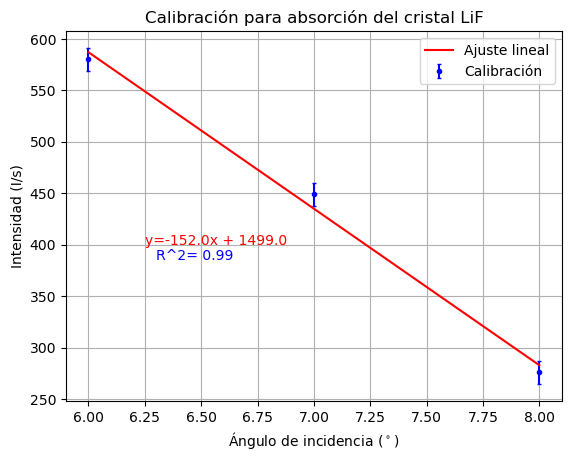

In [123]:
#Calibración de barrido sin material
n = 1
param1 = np.polyfit(Data1A2['Ang'][0:3], Data1A2['In'][0:3], n)

x_ = np.linspace(min(Data1A2['Ang'][0:3]),max(Data1A2['Ang'][0:3]),10)
ym1 = param1[0]*x_+param1[1]

#Obtener medidas de incertidumbre

def GetR2(x,y):
    matrix = np.corrcoef(x, y)
    R2 = (matrix[0,1])**2
    return R2

std = np.std(Data1A2['In'][0:3])
var = np.var(Data1A2['In'][0:3])

#Residuales 
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

plt.errorbar(Data1A2['Ang'][0:3], Data1A2['In'][0:3],yerr=np.sqrt(std),capsize=1.5,color='b',fmt='.', label='Calibración')
plt.plot(x_,ym1,color='r',label='Ajuste lineal')
plt.title('Calibración para absorción del cristal LiF')
plt.ylabel('Intensidad (I/s)')
plt.xlabel(r'Ángulo de incidencia $(^\circ)$')
plt.text(6.25, 400, 'y={}x + {}'.format(round(param1[0],2),round(param1[1],2)),color='r')
plt.text(6.30,385,'R^2= {}'.format(round(GetR2(Data1A2['Ang'][0:3], Data1A2['In'][0:3]),2)),color='b')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Para regresiones lineales o polinómicas de cualquier orden
# n = 1
# param = np.polyfit(x, y, n)

# _x = np.linspace(0,10,2)

# param = GetFit(x,y)
# ym = GetModel(_x,param_az)

In [ ]:
#Obtener medidas de incertidumbre

# def GetR2(x,y):
#     matrix = np.corrcoef(x, y)
#     R2 = (matrix[0,1])**2
#     return R2

#Desviacion estandar
#std = np.std(x,axis=0)
#Varianza
#var = np.var(x,axis=0)

#Residuales 
# def Residuals(y,ym_az):
#     e = []
#     for i in range(0,len(y)):
#         e.append(y[i]-ym[i])
#     return e

In [ ]:
#Perfil de Voight
# alpha = std*np.sqrt(2*np.ln(2))
# mod = VoigtModel()
# pars = mod.guess(y, x=x)
# out = mod.fit(y, pars, x=x)
# out.plot()

In [ ]:
#Graficas
# plt.errorbar(x, y,xerr,capsize=1.5,color='b',fmt='.')
# plt.plot(x,y,color='b')
# plt.title('Gráfica')
# plt.xlabel('C')
# plt.ylabel('V')
# plt.text(6, 7.5, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)),color='b')
# plt.text(6,7.1,'R^2= {}'.format(round(GetR2(x,y),2)),color='b')
# plt.legend()
# plt.show()